In [1]:
# TODO
    # remove non-updated things from update function
    # better (documented) logic for choosing sample distributions and their parameters
    # link / documentation on resources for hist, hist prob density, KDE, sampling and numpy distributions used 
    # interaction to select single chart and watch on separate enlarged view and/or set random seed
    # re factor code for DRY, clear cxes all
        # loop for plotting?
        # plotting parameters as dict

Project: Histograms Animated by Increasing Sample Count for Select Numpy.random Distributions

Title: Histograms Animated by Increasing Sample Count for Numpy.random Distributions

Description: Hisograms visualized with variying bin count based on best practice referenced in week 3 suggested reading on selecting bin count (5-20). KDE added for example of continuous estimation and overlay comparison. Also tried with .hist(density=True) and equal scales but it seemed like sample count made more sense for the y-axis (v2 submitted). Had trouble with saving animation (writer details) on windows, went to Ubuntu and had no issues. Python 3.7.5, Jupyter Lab 3.0.0, Ubuntu 18.04, FFMPEG 3.4.8

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from IPython.display import HTML
import seaborn as sns
%matplotlib notebook

In [3]:
n1 = 50
n2 = 500
n3 = 10000
step1 = 2
step2 = 20
step3 = 200
list_frames = list(range(0,n1,step1)) + list(range(n1,n2,step2)) + list(range(n2,n3,step3)) + [n3]*15
print (list_frames)
# list_frames = list(range(1000,3000,1000))
interval = 100
print("{} seconds".format(interval*len(list_frames)/1000))


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900, 4100, 4300, 4500, 4700, 4900, 5100, 5300, 5500, 5700, 5900, 6100, 6300, 6500, 6700, 6900, 7100, 7300, 7500, 7700, 7900, 8100, 8300, 8500, 8700, 8900, 9100, 9300, 9500, 9700, 9900, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]
11.1 seconds


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900, 4100, 4300, 4500, 4700, 4900, 5100, 5300, 5500, 5700, 5900, 6100, 6300, 6500, 6700, 6900, 7100, 7300, 7500, 7700, 7900, 8100, 8300, 8500, 8700, 8900, 9100, 9300, 9500, 9700, 9900, 10000, 10000, 10000, 10000, 10000]
10.1 seconds


<IPython.core.display.Javascript object>


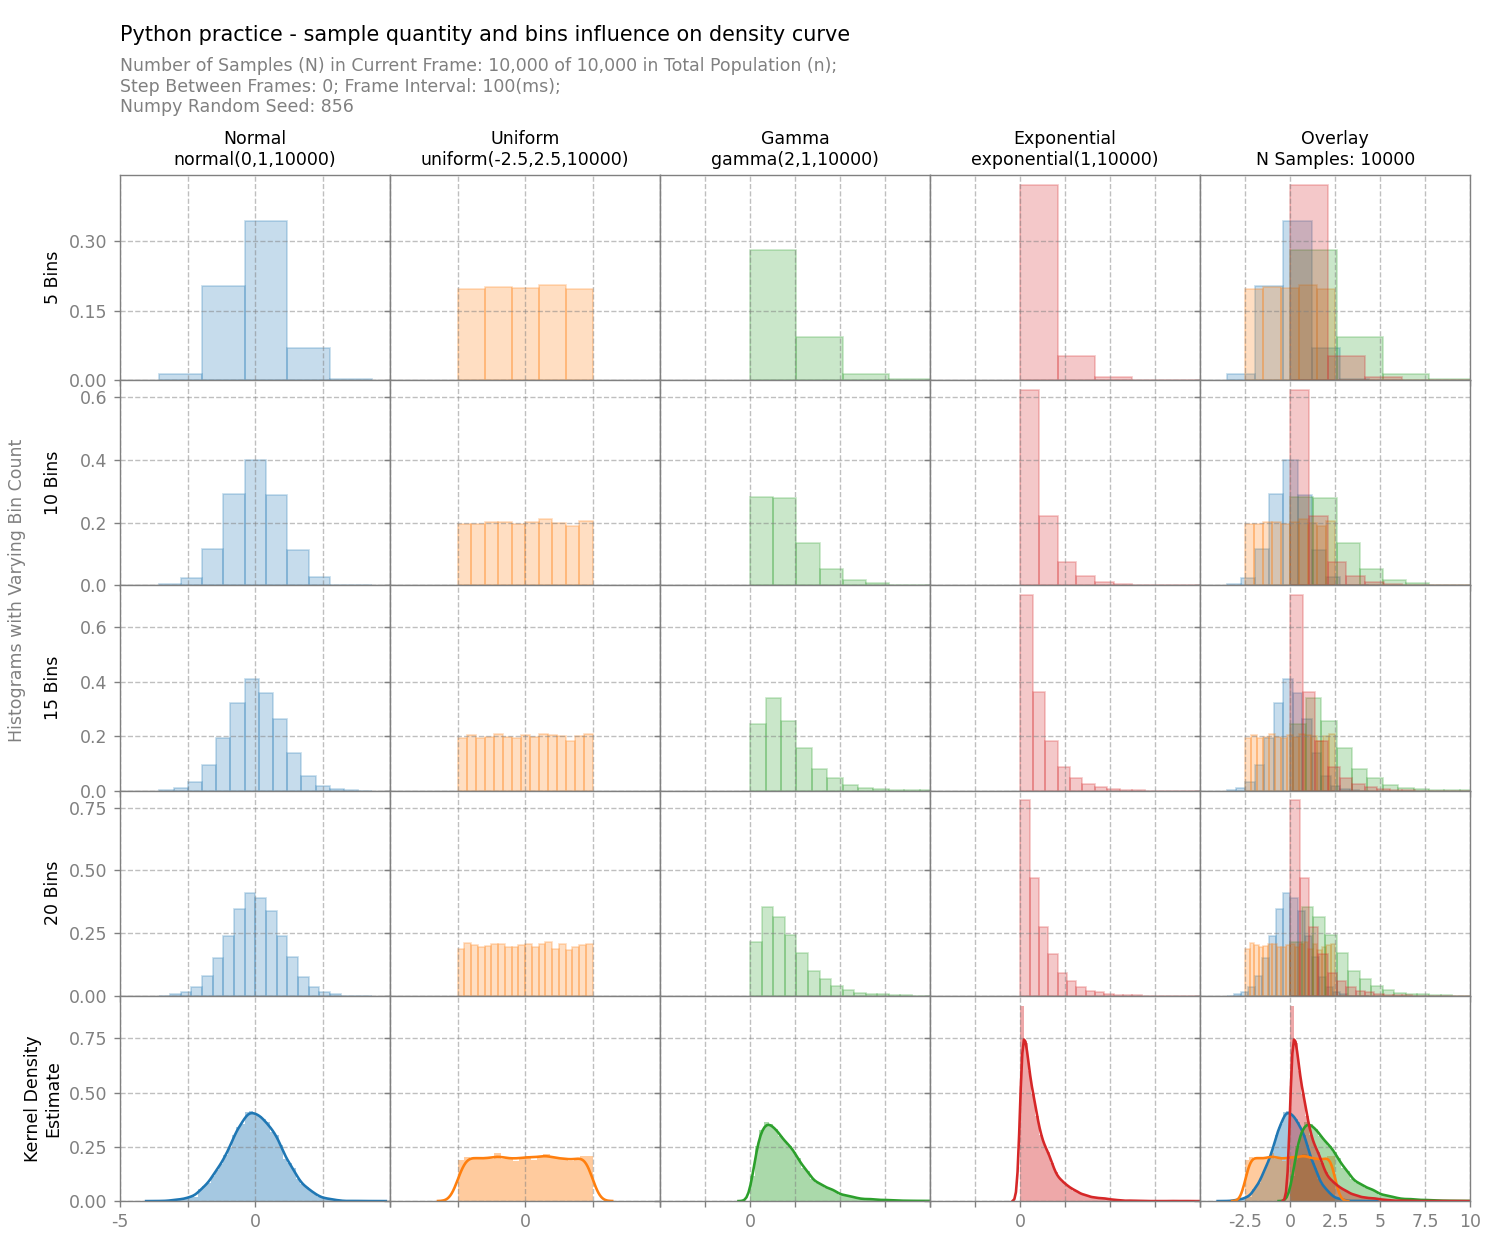

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Wall time: 3min 9s


In [11]:
%%time

random_seed = 856
np.random.seed(random_seed)

n1 = 50
n2 = 500
n3 = 10000
step1 = 2
step2 = 20
step3 = 200
list_frames = list(range(0,n1,step1)) + list(range(n1,n2,step2)) + list(range(n2,n3,step3)) + [n3]*5
print (list_frames)
# list_frames = list(range(1000,3000,1000))
interval = 100
print("{} seconds".format(interval*len(list_frames)/1000))

x1 = np.random.normal(0, 1, 10000)
x2 = np.random.uniform(-2.5,2.5, 10000)
x3 = np.random.gamma(2, 1, 10000)
x4 = np.random.exponential(1, 10000)


def update(curr):
    for t in fig.texts:
        t.set_visible(False)
        # todo get visible or empty string?
    axs[0][0].clear()
    axs[0][0].set_title("Normal\nnormal(0,1,{})".format(curr), fontsize=10)
    axs[0][0].hist(x1[:curr], bins=5, alpha=0.25, density=True, edgecolor=sns.color_palette()[0], color=sns.color_palette()[0])
    axs[0][0].set_ylabel("5 Bins")
    axs[0][4].clear()
    axs[0][4].set_title("Overlay\nN Samples: {}".format(curr), fontsize=10)
    axs[0][4].hist(x1[:curr], bins=5, alpha=0.25, density=True, edgecolor=sns.color_palette()[0], color=sns.color_palette()[0])
    axs[1][0].clear()
    axs[1][0].hist(x1[:curr], bins=10, alpha=0.25, density=True, edgecolor=sns.color_palette()[0], color=sns.color_palette()[0])
    axs[1][0].set_ylabel("10 Bins")
    axs[1][4].clear()
    axs[1][4].hist(x1[:curr], bins=10, alpha=0.25, density=True, edgecolor=sns.color_palette()[0], color=sns.color_palette()[0])
    axs[2][0].clear()
    axs[2][0].hist(x1[:curr], bins=15, alpha=0.25, density=True, edgecolor=sns.color_palette()[0], color=sns.color_palette()[0])
    axs[2][0].set_ylabel("15 Bins")
    axs[2][4].clear()
    axs[2][4].hist(x1[:curr], bins=15, alpha=0.25, density=True, edgecolor=sns.color_palette()[0], color=sns.color_palette()[0])
    axs[3][0].clear()
    axs[3][0].hist(x1[:curr], bins=20, alpha=0.25, density=True, edgecolor=sns.color_palette()[0], color=sns.color_palette()[0])
    axs[3][0].set_ylabel("20 Bins")
    axs[3][4].clear()
    axs[3][4].hist(x1[:curr], bins=20, alpha=0.25, density=True, edgecolor=sns.color_palette()[0], color=sns.color_palette()[0])
    axs[4][0].clear()
    plt.axes(axs[4][0])
    sns.distplot(x1[:curr],  color=sns.color_palette()[0])
    axs[4][0].set_ylabel("Kernel Density\nEstimate")
    axs[4][4].clear()
    plt.axes(axs[4][4])
    sns.distplot(x1[:curr],  color=sns.color_palette()[0])
    
    axs[0][1].clear()
    axs[0][1].set_title("Uniform\nuniform(-2.5,2.5,{})".format(curr), fontsize=10)
    axs[0][1].hist(x2[:curr], bins=5, alpha=0.25, density=True, edgecolor=sns.color_palette()[1], color=sns.color_palette()[1])
    axs[0][4].hist(x2[:curr], bins=5, alpha=0.25, density=True, edgecolor=sns.color_palette()[1], color=sns.color_palette()[1])
    axs[1][1].clear()
    axs[1][1].hist(x2[:curr], bins=10, alpha=0.25, density=True, edgecolor=sns.color_palette()[1], color=sns.color_palette()[1])
    axs[1][4].hist(x2[:curr], bins=10, alpha=0.25, density=True, edgecolor=sns.color_palette()[1], color=sns.color_palette()[1])
    axs[2][1].clear()
    axs[2][1].hist(x2[:curr], bins=15, alpha=0.25, density=True, edgecolor=sns.color_palette()[1], color=sns.color_palette()[1])
    axs[2][4].hist(x2[:curr], bins=15, alpha=0.25, density=True, edgecolor=sns.color_palette()[1], color=sns.color_palette()[1])
    axs[3][1].clear()
    axs[3][1].hist(x2[:curr], bins=20, alpha=0.25, density=True, edgecolor=sns.color_palette()[1], color=sns.color_palette()[1])
    axs[3][4].hist(x2[:curr], bins=20, alpha=0.25, density=True, edgecolor=sns.color_palette()[1], color=sns.color_palette()[1])
    axs[4][1].clear()
    plt.axes(axs[4][1])
    sns.distplot(x2[:curr],  color=sns.color_palette()[1])
    plt.axes(axs[4][4])
    sns.distplot(x2[:curr],  color=sns.color_palette()[1])
    
    axs[0][2].clear()
    axs[0][2].set_title("Gamma\ngamma(2,1,{})".format(curr), fontsize=10)
    axs[0][2].hist(x3[:curr], bins=5, alpha=0.25, density=True, edgecolor=sns.color_palette()[2], color=sns.color_palette()[2])
    axs[0][4].hist(x3[:curr], bins=5, alpha=0.25, density=True, color=sns.color_palette()[2], edgecolor=sns.color_palette()[2])
    axs[1][2].clear()
    axs[1][2].hist(x3[:curr], bins=10, alpha=0.25, density=True, edgecolor=sns.color_palette()[2], color=sns.color_palette()[2])
    axs[1][4].hist(x3[:curr], bins=10, alpha=0.25, density=True, edgecolor=sns.color_palette()[2], color=sns.color_palette()[2])
    axs[2][2].clear()
    axs[2][2].hist(x3[:curr], bins=15, alpha=0.25, density=True, edgecolor=sns.color_palette()[2], color=sns.color_palette()[2])
    axs[2][4].hist(x3[:curr], bins=15, alpha=0.25, density=True, edgecolor=sns.color_palette()[2], color=sns.color_palette()[2])
    axs[3][2].clear()
    axs[3][2].hist(x3[:curr], bins=20, alpha=0.25, density=True, edgecolor=sns.color_palette()[2], color=sns.color_palette()[2])
    axs[3][4].hist(x3[:curr], bins=20, alpha=0.25, density=True, edgecolor=sns.color_palette()[2], color=sns.color_palette()[2])
    axs[4][2].clear()
    plt.axes(axs[4][2])
    sns.distplot(x3[:curr],  color=sns.color_palette()[2])
    plt.axes(axs[4][4])
    sns.distplot(x3[:curr],  color=sns.color_palette()[2])
    
    axs[0][3].clear()
    axs[0][3].set_title("Exponential\nexponential(1,{})".format(curr), fontsize=10)
    axs[0][3].hist(x4[:curr], bins=5, alpha=0.25, density=True, edgecolor=sns.color_palette()[3], color=sns.color_palette()[3])
    axs[0][4].hist(x4[:curr], bins=5, alpha=0.25, density=True, edgecolor=sns.color_palette()[3], color=sns.color_palette()[3])
    axs[1][3].clear()
    axs[1][3].hist(x4[:curr], bins=10, alpha=0.25, density=True, edgecolor=sns.color_palette()[3], color=sns.color_palette()[3])
    axs[1][4].hist(x4[:curr], bins=10, alpha=0.25, density=True, edgecolor=sns.color_palette()[3], color=sns.color_palette()[3])
    axs[2][3].clear()
    axs[2][3].hist(x4[:curr], bins=15, alpha=0.25, density=True, edgecolor=sns.color_palette()[3], color=sns.color_palette()[3])
    axs[2][4].hist(x4[:curr], bins=15, alpha=0.25, density=True, edgecolor=sns.color_palette()[3], color=sns.color_palette()[3])
    axs[3][3].clear()
    axs[3][3].hist(x4[:curr], bins=20, alpha=0.25, density=True, edgecolor=sns.color_palette()[3], color=sns.color_palette()[3])
    axs[3][4].hist(x4[:curr], bins=20, alpha=0.25, density=True, edgecolor=sns.color_palette()[3], color=sns.color_palette()[3])
    axs[4][3].clear()
    plt.axes(axs[4][3])
    sns.distplot(x4[:curr],  color=sns.color_palette()[3])
    plt.axes(axs[4][4])
    sns.distplot(x4[:curr],  color=sns.color_palette()[3])
    
    
    fig.align_ylabels(axs[:, 0])
    axs[0][0].yaxis.set_major_locator(ticker.MaxNLocator(4))
    axs[1][0].yaxis.set_major_locator(ticker.MaxNLocator(4))
    axs[2][0].yaxis.set_major_locator(ticker.MaxNLocator(4))
    axs[3][0].yaxis.set_major_locator(ticker.MaxNLocator(4))
    axs[4][0].yaxis.set_major_locator(ticker.MaxNLocator(4))
    #axs[3][0].set_ylim(axs[0][0].get_ylim())
    #axs[2][0].set_ylim(axs[0][0].get_ylim())
    #axs[1][0].set_ylim(axs[0][0].get_ylim())
    
    axs[0][0].set_xlim([-5,5])
    axs[0][0].set_xticks([-5, -2.5, 0, 2.5, 5])
    axs[0][0].set_xticklabels(["-5","", "0", "", ""])
    axs[0][3].xli
    axs[0][3].set_xticks([-5, -2.5, 0, 2.5, 5, 7.5, 10])
    axs[0][3].set_xticklabels(["","", "0", "", "", "", ""])
    axs[0][2].set_xlim([-5,10])
    axs[0][2].set_xticks([-5, -2.5, 0, 2.5, 5, 7.5, 10])
    axs[0][2].set_xticklabels(["","", "0", "", "", "", ""])
    axs[0][1].set_xlim([-5,5])
    axs[0][1].set_xticks([-5, -2.5, 0, 2.5, 5])
    axs[0][1].set_xticklabels(["","", "0", "", ""])
    axs[0][4].set_xlim([-5,10])
    axs[0][4].set_xticks([-5, -2.5, 0, 2.5, 5, 7.5, 10])
    axs[0][4].set_xticklabels(["","-2.5", "0", "2.5", "5", "7.5", "10"])
    
    supstring1 = "Python practice - sample quantity and bins influence on density curve"
    fig.suptitle(supstring1, ha="left", x=0.08)
    supstring2 = "Number of Samples (N) in Current Frame: {:,} of 10,000 in Total Population (n);\nStep Between Frames: {}; Frame Interval: {}(ms);\nNumpy Random Seed: {}"
    subtitle_text = fig.text(0.08, 0.91, "", color="gray")
    if curr > n1 and curr <= n2:
        subtitle_text.set_text(supstring2.format(curr, step2, interval, random_seed))
    elif curr > n2 and curr < n3:
        subtitle_text.set_text(supstring2.format(curr, step3, interval, random_seed))
    elif curr == n3:
        subtitle_text.set_text(supstring2.format(curr, "0", interval, random_seed))
    else:
        subtitle_text.set_text(supstring2.format(curr, step1, interval, random_seed))
    fig.text(0.005, 0.41, "Histograms with Varying Bin Count", rotation=90, color="gray")
    plt.tight_layout()    
    plt.subplots_adjust(hspace=.0,wspace=.0,left=0.08, top=0.86)
    
    for ax in axs.flat:
        ax.grid(b=True, color="gray", linestyle="--", alpha=0.5)
        ax.spines["top"].set_color("gray")
        ax.spines["bottom"].set_color("gray")
        ax.spines["left"].set_color("gray")
        ax.spines["right"].set_color("gray")
        ax.tick_params(axis="x", colors="gray")
        ax.tick_params(axis="y", colors="gray")

my_dpi = 120
my_figsize = (12,10)
my_pxsize = (my_figsize[0]*100, my_figsize[1]*100)

# mpl.rcParams['figure.dpi'] = my_dpi

# figsize=(my_pxsize[0]/my_dpi,my_pxsize[1]/my_dpi)
fig, axs = plt.subplots(nrows=5, ncols=5, constrained_layout=False, sharey='row', sharex='col', facecolor="white", figsize=my_figsize)
a = animation.FuncAnimation(fig, update, frames=list_frames, interval=interval)

FFMpegWriter = animation.writers['ffmpeg']
writer = FFMpegWriter(bitrate=-1)
a.save("practice_assignment3_v3.mp4", writer=writer)
# a.save("practice_assignment3_v3.mp4")

# a.save("practice_assignment3_v3.mp4")

#HTML(a.to_jshtml())
#html = a.to_html5_video()
#HTML(html)


In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [16]:
Q = np.arange(0,31)
P = 15 - Q/2

Text(0, 0.5, 'Price')

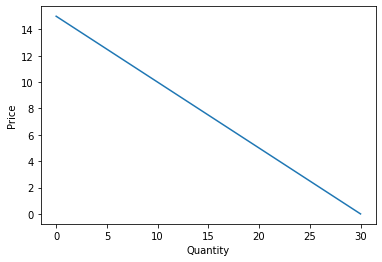

In [19]:
plt.plot(Q,P)
plt.xlabel('Quantity')
plt.ylabel('Price')